In [1]:
import dask.dataframe as dd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = dd.read_csv('air_traffic_data.csv')

df = df.repartition(npartitions=4)


In [3]:
def bitcoin(bitcoin_amount, bitcoin_value_euros):
    return bitcoin_amount * bitcoin_value_euros

In [7]:
#creamos una columna bitcoin en el dataset

df['bitcoin'] = df.map_partitions(lambda df: np.random.rand(len(df))*100, meta=float)

df.to_csv('air_traffic_data_bitcoin.csv', single_file = True)

# creamos una columna pasando las bitcoins a euros usando la funcion de arriba

df['bitcoin_euros'] = df.map_partitions(lambda df: bitcoin(df['bitcoin'], 25114), meta=float)


<AxesSubplot:>

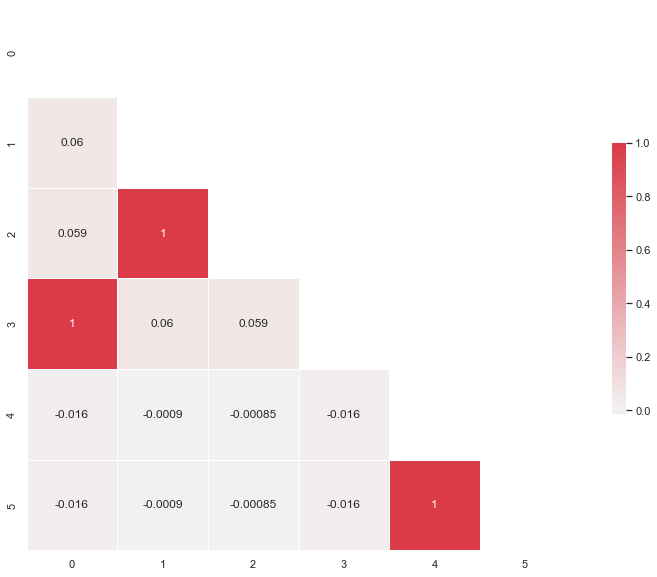

In [8]:
plt.figure(figsize=(15, 10))

sns.set(style='white')

mask=np.triu(np.ones_like(df.corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)


sns.heatmap(df.corr(),
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5})

In [9]:
def alerta(euros):
    if euros > 30000:
        return 'ALERTA'
    else:
        return 'OK'
